## 2. Supervised Learning
### 2.3 Supervised Machine Learning Algorithms

In [11]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_boston

#### 2.3.1 Some Sample Datasets

- forge(거짓의, 허위의) 데이터셋
  - 이진 분류 데이터셋

X.shape: (26, 2)
X:
[[  9.96346605   4.59676542]
 [ 11.0329545   -0.16816717]
 [ 11.54155807   5.21116083]
 [  8.69289001   1.54322016]
 [  8.1062269    4.28695977]
 [  8.30988863   4.80623966]
 [ 11.93027136   4.64866327]
 [  9.67284681  -0.20283165]
 [  8.34810316   5.13415623]
 [  8.67494727   4.47573059]
 [  9.17748385   5.09283177]
 [ 10.24028948   2.45544401]
 [  8.68937095   1.48709629]
 [  8.92229526  -0.63993225]
 [  9.49123469   4.33224792]
 [  9.25694192   5.13284858]
 [  7.99815287   4.8525051 ]
 [  8.18378052   1.29564214]
 [  8.7337095    2.49162431]
 [  9.32298256   5.09840649]
 [ 10.06393839   0.99078055]
 [  9.50048972  -0.26430318]
 [  8.34468785   1.63824349]
 [  9.50169345   1.93824624]
 [  9.15072323   5.49832246]
 [ 11.563957     1.3389402 ]]
y.shape: (26,)
y:
[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


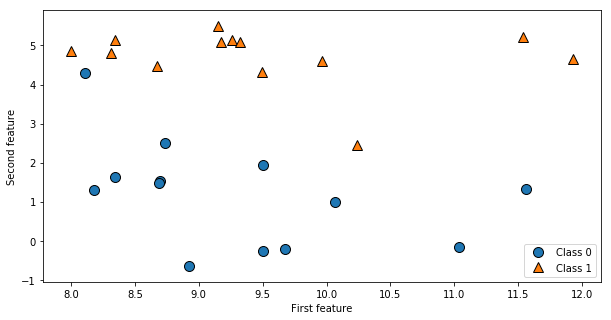

In [2]:
# generate dataset
X, y = mglearn.datasets.make_forge()
print("X.shape: {}".format(X.shape))
print("X:\n{}".format(X))
print("y.shape: {}".format(y.shape))
print("y:\n{}".format(y))

# plot dataset
plt.figure(figsize=(10, 5))
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

- make_forge()를 이용하여 인위적으로 이진 분류 데이터셋을 만들었다.
- 두 클래스가 각각 다른 색상으로 표현되어 있다.
- 첫 번째 feature와 두 번째 feature에 대한 관계를 표현한다.

- wave 데이터셋

X.shape: (40, 1)
X:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]
 [-2.87649303]
 [ 2.81945911]
 [ 1.99465584]
 [-1.72596534]
 [-1.9090502 ]
 [-1.89957294]
 [-1.17454654]
 [ 0.14853859]
 [-0.40832989]
 [-1.25262516]
 [ 0.67111737]
 [-2.16303684]
 [-1.24713211]
 [-0.80182894]
 [-0.26358009]
 [ 1.71105577]
 [-1.80195731]
 [ 0.08540663]
 [ 0.55448741]
 [-2.72129752]
 [ 0.64526911]
 [-1.97685526]
 [-2.60969044]
 [ 2.69331322]
 [ 2.7937922 ]
 [ 1.85038409]
 [-1.17231738]
 [-2.41396732]
 [ 1.10539816]
 [-0.35908504]]
y.shape: (40,)
y:
[-0.44822073  0.33122576  0.77932073  0.03497884 -1.38773632 -2.47196233
 -1.52730805  1.49417157  1.00032374  0.22956153 -1.05979555  0.7789638
  0.75418806 -1.51369739 -1.67303415 -0.90496988  0.08448544 -0.52734666
 -0.54114599 -0.3409073   0.21778193 -1.12469096  0.37299129  0.09756349
 -0.98618122  0.96695428 -1.13455014  0.69798591  0.43655826 -0.956521

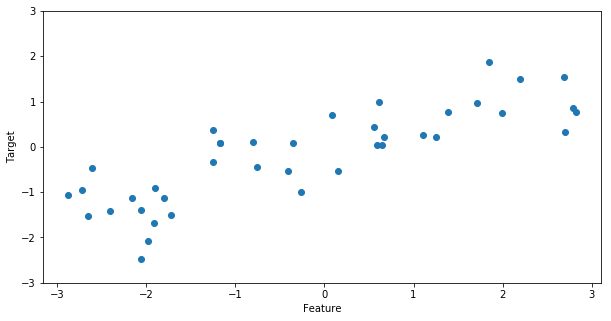

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)
print("X.shape: {}".format(X.shape))
print("X:\n{}".format(X))
print("y.shape: {}".format(y.shape))
print("y:\n{}".format(y))

plt.figure(figsize=(10, 5))
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show()

- Wisconsin Breast Cancer 데이터셋

In [4]:
# from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): {}".format(cancer.keys()))

cancer.keys(): dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [17]:
cancer.data

array([[  1.79900000e+01,   1.03800000e+01,   1.22800000e+02, ...,
          2.65400000e-01,   4.60100000e-01,   1.18900000e-01],
       [  2.05700000e+01,   1.77700000e+01,   1.32900000e+02, ...,
          1.86000000e-01,   2.75000000e-01,   8.90200000e-02],
       [  1.96900000e+01,   2.12500000e+01,   1.30000000e+02, ...,
          2.43000000e-01,   3.61300000e-01,   8.75800000e-02],
       ..., 
       [  1.66000000e+01,   2.80800000e+01,   1.08300000e+02, ...,
          1.41800000e-01,   2.21800000e-01,   7.82000000e-02],
       [  2.06000000e+01,   2.93300000e+01,   1.40100000e+02, ...,
          2.65000000e-01,   4.08700000e-01,   1.24000000e-01],
       [  7.76000000e+00,   2.45400000e+01,   4.79200000e+01, ...,
          0.00000000e+00,   2.87100000e-01,   7.03900000e-02]])

In [18]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0,

In [19]:
cancer.target_names # malignant: 악성의

array(['malignant', 'benign'],
      dtype='<U9')

In [20]:
print("Shape of cancer data: {}".format(cancer.data.shape))
print("Shape of cancer target: {}".format(cancer.target.shape))

Shape of cancer data: (569, 30)
Shape of cancer target: (569,)


In [9]:
print("Sample counts per class:\n{}".format(
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}
))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [10]:
print("Feature names:\n{}".format(cancer.feature_names)) # 30개의 feature

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


- Boston Housing 데이터셋

In [12]:
# from sklearn.datasets import load_boston
boston = load_boston()
print("boston.keys(): {}".format(boston.keys()))

boston.keys(): dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [13]:
print("Feature Names: {}".format(boston.feature_names))
print("Feature Names: {}".format(boston.DESCR))

Feature Names: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Feature Names: Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highw

In [22]:
boston.data

array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00, ...,
          1.53000000e+01,   3.96900000e+02,   4.98000000e+00],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.96900000e+02,   9.14000000e+00],
       [  2.72900000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.92830000e+02,   4.03000000e+00],
       ..., 
       [  6.07600000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   5.64000000e+00],
       [  1.09590000e-01,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.93450000e+02,   6.48000000e+00],
       [  4.74100000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   7.88000000e+00]])

In [23]:
boston.target # 회귀라고 판단 가능

array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,  22.9,  27.1,  16.5,
        18.9,  15. ,  18.9,  21.7,  20.4,  18.2,  19.9,  23.1,  17.5,
        20.2,  18.2,  13.6,  19.6,  15.2,  14.5,  15.6,  13.9,  16.6,
        14.8,  18.4,  21. ,  12.7,  14.5,  13.2,  13.1,  13.5,  18.9,
        20. ,  21. ,  24.7,  30.8,  34.9,  26.6,  25.3,  24.7,  21.2,
        19.3,  20. ,  16.6,  14.4,  19.4,  19.7,  20.5,  25. ,  23.4,
        18.9,  35.4,  24.7,  31.6,  23.3,  19.6,  18.7,  16. ,  22.2,
        25. ,  33. ,  23.5,  19.4,  22. ,  17.4,  20.9,  24.2,  21.7,
        22.8,  23.4,  24.1,  21.4,  20. ,  20.8,  21.2,  20.3,  28. ,
        23.9,  24.8,  22.9,  23.9,  26.6,  22.5,  22.2,  23.6,  28.7,
        22.6,  22. ,  22.9,  25. ,  20.6,  28.4,  21.4,  38.7,  43.8,
        33.2,  27.5,  26.5,  18.6,  19.3,  20.1,  19.5,  19.5,  20.4,
        19.8,  19.4,  21.7,  22.8,  18.8,  18.7,  18.5,  18.3,  21.2,
        19.2,  20.4,  19.3,  22. ,  20.3,  20.5,  17.3,  18.8,  21.4,
        15.7,  16.2,

In [14]:
print("Data shape: {}".format(boston.data.shape))
print("Target shape: {}".format(boston.target.shape))

Data shape: (506, 13)
Target shape: (506,)


In [24]:
boston.feature_names # 13개의 feature

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='<U7')

In [29]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape)) 
# 13 -> 104, feature 개수 늘림. feature개수가 더 좋은지는 알 수 없음
print("y.shape: {}".format(y.shape))

X.shape: (506, 104)
y.shape: (506,)


In [25]:
type(X)

numpy.ndarray

In [26]:
X.shape 

(506, 104)

In [27]:
X

array([[  0.00000000e+00,   1.80000000e-01,   6.78152493e-02, ...,
          1.00000000e+00,   8.96799117e-02,   8.04248656e-03],
       [  2.35922539e-04,   0.00000000e+00,   2.42302053e-01, ...,
          1.00000000e+00,   2.04470199e-01,   4.18080621e-02],
       [  2.35697744e-04,   0.00000000e+00,   2.42302053e-01, ...,
          9.79579831e-01,   6.28144504e-02,   4.02790570e-03],
       ..., 
       [  6.11892474e-04,   0.00000000e+00,   4.20454545e-01, ...,
          1.00000000e+00,   1.07891832e-01,   1.16406475e-02],
       [  1.16072990e-03,   0.00000000e+00,   4.20454545e-01, ...,
          9.82676920e-01,   1.29930407e-01,   1.71795127e-02],
       [  4.61841693e-04,   0.00000000e+00,   4.20454545e-01, ...,
          1.00000000e+00,   1.69701987e-01,   2.87987643e-02]])

In [30]:
y

array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,  22.9,  27.1,  16.5,
        18.9,  15. ,  18.9,  21.7,  20.4,  18.2,  19.9,  23.1,  17.5,
        20.2,  18.2,  13.6,  19.6,  15.2,  14.5,  15.6,  13.9,  16.6,
        14.8,  18.4,  21. ,  12.7,  14.5,  13.2,  13.1,  13.5,  18.9,
        20. ,  21. ,  24.7,  30.8,  34.9,  26.6,  25.3,  24.7,  21.2,
        19.3,  20. ,  16.6,  14.4,  19.4,  19.7,  20.5,  25. ,  23.4,
        18.9,  35.4,  24.7,  31.6,  23.3,  19.6,  18.7,  16. ,  22.2,
        25. ,  33. ,  23.5,  19.4,  22. ,  17.4,  20.9,  24.2,  21.7,
        22.8,  23.4,  24.1,  21.4,  20. ,  20.8,  21.2,  20.3,  28. ,
        23.9,  24.8,  22.9,  23.9,  26.6,  22.5,  22.2,  23.6,  28.7,
        22.6,  22. ,  22.9,  25. ,  20.6,  28.4,  21.4,  38.7,  43.8,
        33.2,  27.5,  26.5,  18.6,  19.3,  20.1,  19.5,  19.5,  20.4,
        19.8,  19.4,  21.7,  22.8,  18.8,  18.7,  18.5,  18.3,  21.2,
        19.2,  20.4,  19.3,  22. ,  20.3,  20.5,  17.3,  18.8,  21.4,
        15.7,  16.2,